In [58]:
# ✅ 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [59]:
# ✅ 2. Load the Dataset (use engine='python' to avoid parser issues)
df = pd.read_csv('/content/bank-full.csv', sep=';', engine='python')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Shape: (45211, 17)
Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


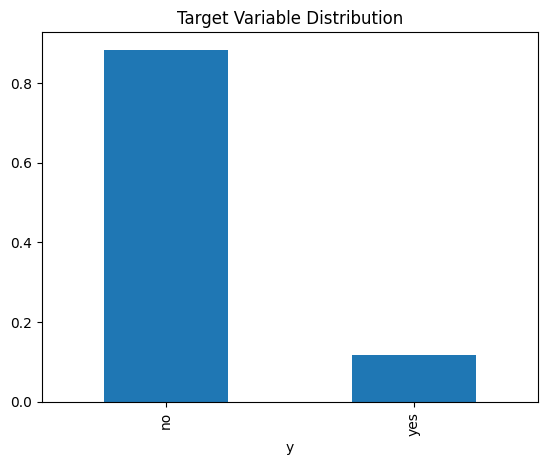

In [60]:
# ✅ 3. Initial Exploration
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Variable Distribution')
plt.show()


Text(0.5, 1.0, 'Subscriptions per Month')

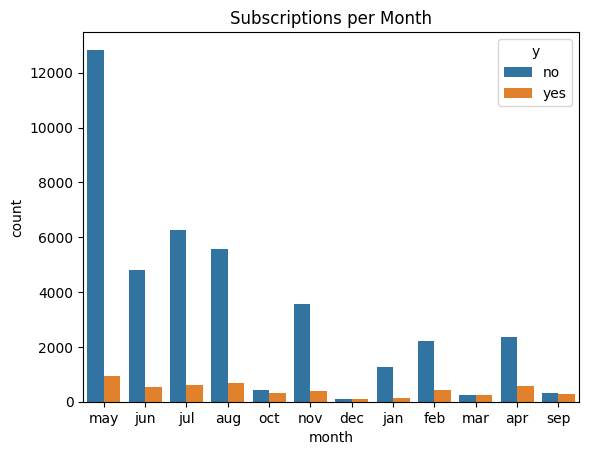

In [77]:
sns.countplot(x='month', hue='y', data=df)
plt.title('Subscriptions per Month')


Text(0.5, 1.0, 'Subscription Rate by Job')

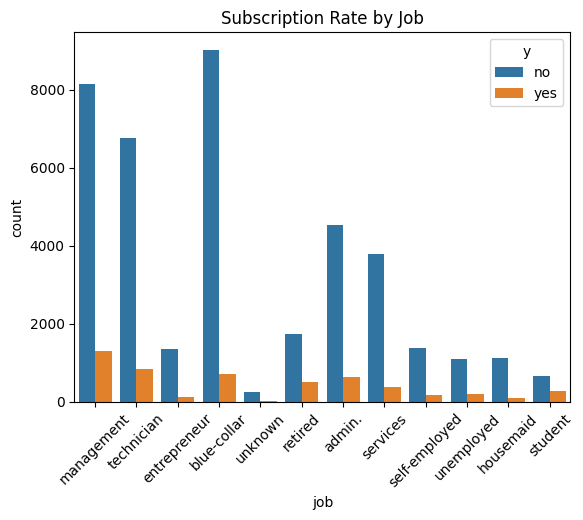

In [78]:
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Subscription Rate by Job')


In [61]:
# ✅ 4. Label Encode Categorical Variables
le = LabelEncoder()
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [62]:
# ✅ 5. Feature and Target Separation
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


In [63]:
# ✅ 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# ✅ 7. Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.8740462235983634
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



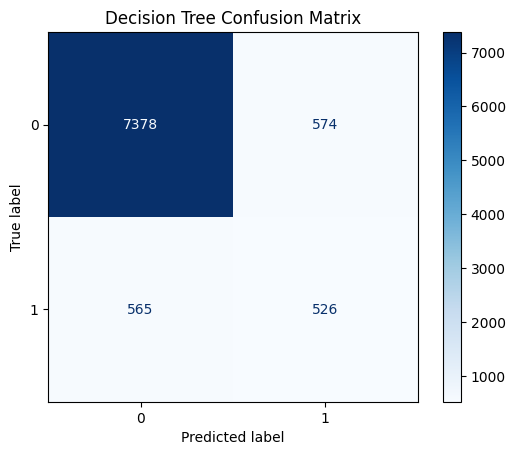

In [65]:
# ✅ 8. Evaluation of Decision Tree
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


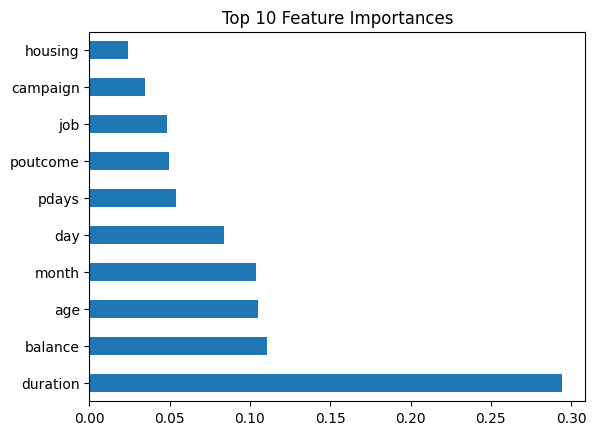

In [66]:
# ✅ 9. Feature Importance Plot
feat_importance = pd.Series(clf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.show()


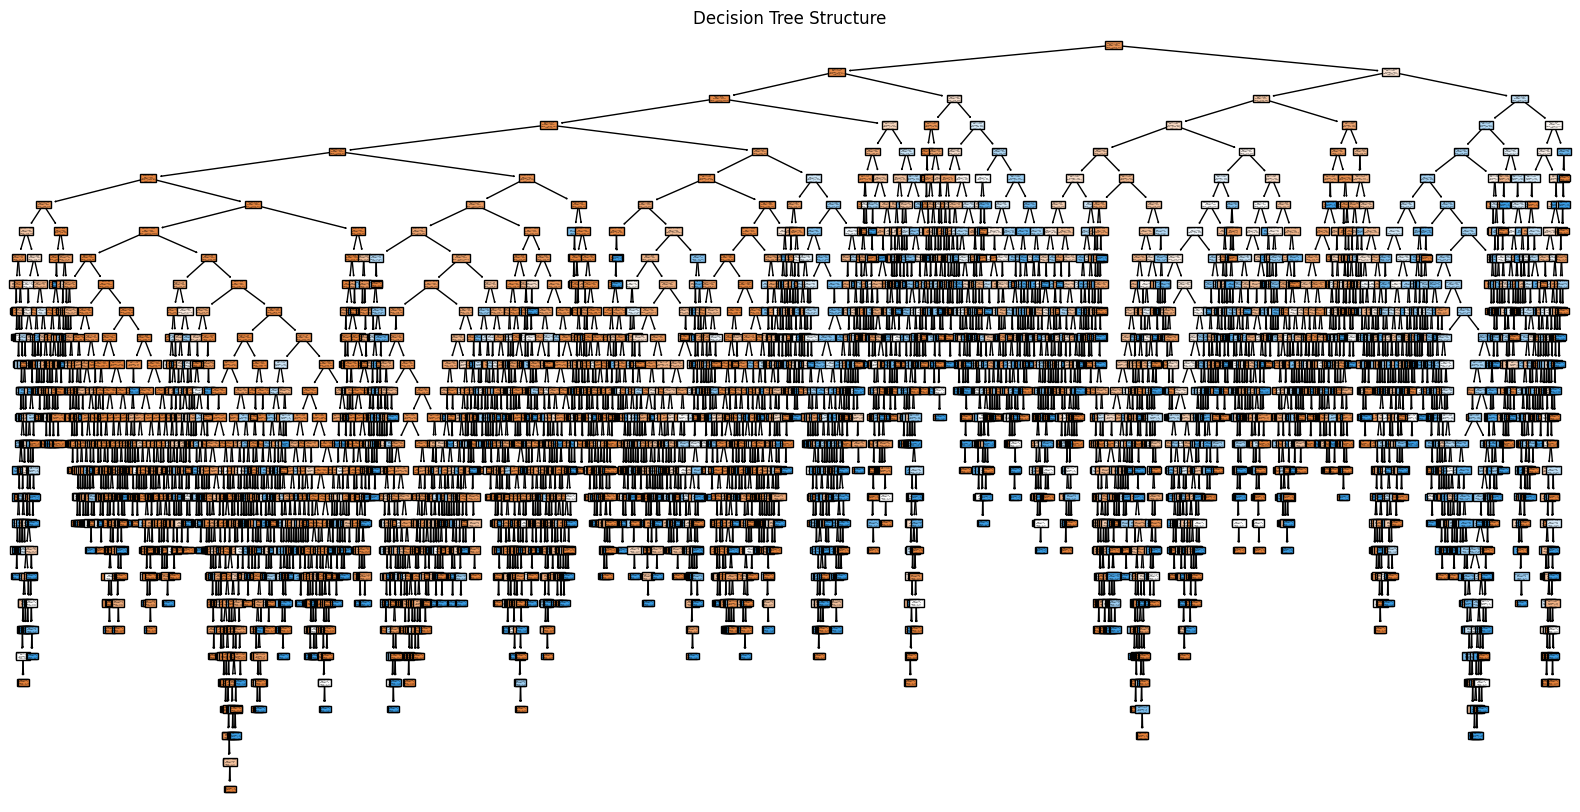

In [67]:
# ✅ 10. Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [68]:
# ✅ 11. Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5}


In [69]:
# ✅ 12. Compare with Random Forest and SVM
models = {
    'Decision Tree': DecisionTreeClassifier(**grid.best_params_),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.2f}")


Decision Tree Accuracy: 0.89
Random Forest Accuracy: 0.90
SVM Accuracy: 0.88


In [70]:
# ✅ 13. Cross-Validation for Robustness
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} CV Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Decision Tree CV Accuracy: 0.70 ± 0.08
Random Forest CV Accuracy: 0.70 ± 0.15
SVM CV Accuracy: 0.88 ± 0.00


Text(0.5, 1.0, 'Feature Correlation Matrix')

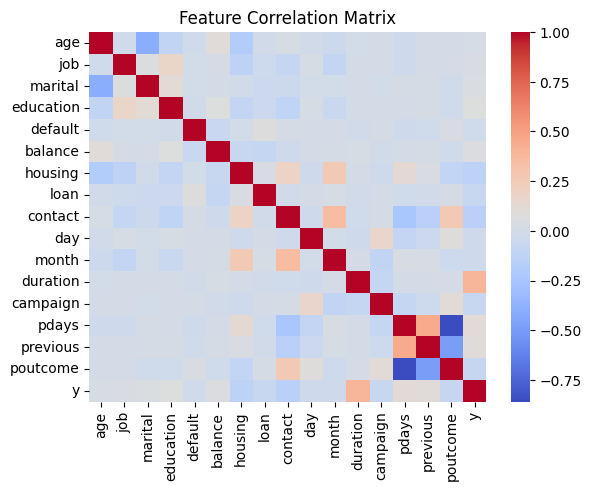

In [80]:
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
